In [627]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [628]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        self.epoch = []
        self.train_loss = []
        self.weights = None # np.random.randint(low = 1000, size=(X.shape[1], 1))  # 維度應該跟著 feature 數量變動 所以還需要改

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        
        X = np.c_[np.ones((X.shape[0], 1)), X]
        # print(y.shape)
        y = y.reshape(y.shape[0], 1)
        # print(y.shape)
        self.weights = np.random.randint(low = 1, size=(X.shape[1], 1))  # 維度應該跟著 feature 數量變動 所以還需要改

        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):
                
                start = batch * batch_size
                end = start + batch_size

                X_batch = X[start:end]
                y_batch = y[start:end]

                loss = self.get_loss(X_batch, y_batch)
                # print(X_batch.T.shape)
                # print(self.predict(X_batch).shape)
                # print(y_batch.shape)
                # print((self.predict(X_batch) - y_batch).shape)
                # print()
                loss_deri = np.dot(X_batch.T, self.predict(X_batch) - y_batch) / X_batch.shape[0]
                # print(np.dot(X_batch.T, self.predict(X_batch) - y_batch).shape)
                # print(loss_deri.shape)
                self.weights = self.weights - lr*loss_deri

                pass
            
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))

    def get_loss(self, X, y):
        y_pred = self.predict(X)
        mse = (np.square(y_pred - y)).mean()
        return mse 

        pass

    def predict(self, X):
        pred = X @ self.weights
        return pred
        pass
                
    def evaluate(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y = y.reshape(y.shape[0], 1)
        loss = self.get_loss(X, y)
        return loss 
        pass
        
    def plot_curve(self):
        
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss,'b-')
        plt.xlabel('epoches')
        plt.ylabel('MSE')
        plt.title('MSE loss')
        plt.show()

        pass


# Load data & data pre-processing

In [629]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [630]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [631]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [632]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [633]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1
df_train["sex"] = df_train["sex"].str.replace("female", "0")
df_train["sex"] = df_train["sex"].str.replace("male", "1")
df_train["sex"] = df_train["sex"].astype("int64")

df_val["sex"] = df_val["sex"].str.replace("female", "0")
df_val["sex"] = df_val["sex"].str.replace("male", "1")
df_val["sex"] = df_val["sex"].astype("int64")

df_test["sex"] = df_test["sex"].str.replace("female", "0")
df_test["sex"] = df_test["sex"].str.replace("male", "1")
df_test["sex"] = df_test["sex"].astype("int64")

# smoker.no -> 0
# smoker.yes -> 1
df_train["smoker"] = df_train["smoker"].str.replace("no", "0")
df_train["smoker"] = df_train["smoker"].str.replace("yes", "1")
df_train["smoker"] = df_train["smoker"].astype("int64")

df_val["smoker"] = df_val["smoker"].str.replace("no", "0")
df_val["smoker"] = df_val["smoker"].str.replace("yes", "1")
df_val["smoker"] = df_val["smoker"].astype("int64")

df_test["smoker"] = df_test["smoker"].str.replace("no", "0")
df_test["smoker"] = df_test["smoker"].str.replace("yes", "1")
df_test["smoker"] = df_test["smoker"].astype("int64")

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
df_train["region"] = df_train["region"].str.replace("northeast", "0")
df_train["region"] = df_train["region"].str.replace("northwest", "1")
df_train["region"] = df_train["region"].str.replace("southeast", "2")
df_train["region"] = df_train["region"].str.replace("southwest", "3")
df_train["region"] = df_train["region"].astype("int64")

df_val["region"] = df_val["region"].str.replace("northeast", "0")
df_val["region"] = df_val["region"].str.replace("northwest", "1")
df_val["region"] = df_val["region"].str.replace("southeast", "2")
df_val["region"] = df_val["region"].str.replace("southwest", "3")
df_val["region"] = df_val["region"].astype("int64")

df_test["region"] = df_test["region"].str.replace("northeast", "0")
df_test["region"] = df_test["region"].str.replace("northwest", "1")
df_test["region"] = df_test["region"].str.replace("southeast", "2")
df_test["region"] = df_test["region"].str.replace("southwest", "3")
df_test["region"] = df_test["region"].astype("int64")
##################################################################


# You may try different label encoding for training your own model


In [634]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Single feature (using bmi)

In [635]:
# Do not modify here
x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [636]:
# TODO
# You may convert data to NumPy here 

x_train = x_train.to_numpy(dtype='f')
# x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
# print(x_train.shape)
# print(x_train.ndim)
# print(x_train[0:5])

y_train = y_train.to_numpy(dtype='f')
# print(y_train.shape)
# print(y_train.ndim)
# print(y_train[0:5])

x_val = x_val.to_numpy(dtype='f')
# x_val = np.c_[np.ones((x_val.shape[0], 1)), x_val]

y_val = y_val.to_numpy(dtype='f')

x_test = x_test.to_numpy(dtype='f')
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
# print(x_test.shape)

In [637]:
batch_size = x_train.shape[0]
# print(batch_size)

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 0.00082
epochs = 250000


linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)
print(linear_reg.train_loss[-4:-1])

[139562065.576363, 139562065.57636166, 139562065.57636034]


In [638]:
print("Intercepts: ", linear_reg.weights[0])
print("Weights: ", linear_reg.weights[1:])

Intercepts:  [1381.75868757]
Weights:  [[380.1589194]]


In [639]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.576359


In [640]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920176.373407


In [641]:
test_pred = linear_reg.predict(x_test)

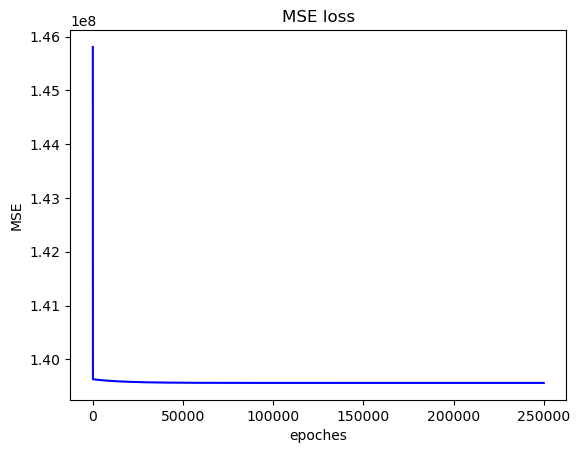

In [642]:
linear_reg.plot_curve()

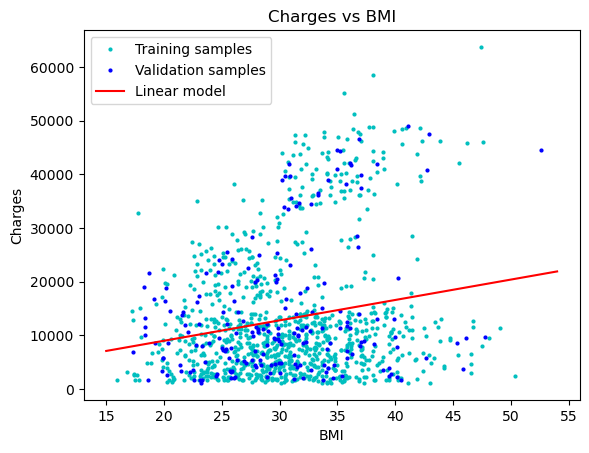

In [643]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

plt.plot(x_train,y_train,'co', label='Training samples', markersize=2)
plt.plot(x_val, y_val,'bo', label='Validation samples', markersize=2)
x = range(15, 55)
y = [linear_reg.weights[1:][0]*x1+linear_reg.weights[0] for x1 in x]
plt.plot(x, y, color='#FF0000', label='Linear model')

plt.ylabel('Charges')
plt.xlabel('BMI')
plt.title('Charges vs BMI')
plt.legend()
plt.show()

# Multiple features

In [644]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [645]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]


In [646]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.00074
epochs = 800000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)
print(linear_reg.train_loss[-4:-1])

[34697170.25351919, 34697170.253519185, 34697170.253519185]


In [647]:
print("Intercepts: ", linear_reg.weights[0])
print("Weights: ", linear_reg.weights[1:])

Intercepts:  [-11857.05679575]
Weights:  [[  259.85086158]
 [ -383.54528022]
 [  333.33250233]
 [  442.55746917]
 [24032.22097208]
 [ -416.01439697]]


In [648]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.253519185


In [649]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958565.71631926


In [650]:
test_pred = linear_reg.predict(x_test)

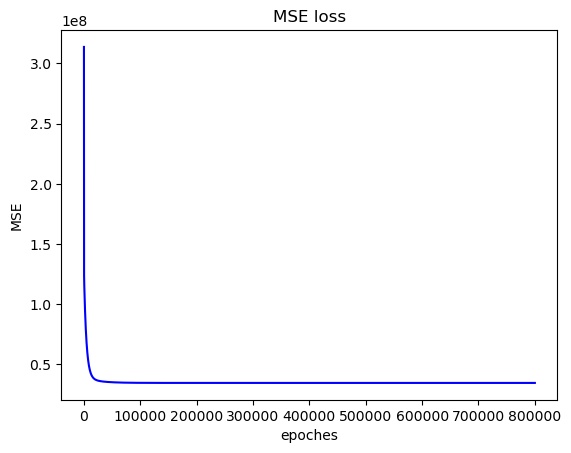

In [651]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [652]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [653]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")